In [12]:
import networkx as nx
g = nx.Graph()
g.add_nodes_from(['a','b','c','d'])
g.add_edge('a','b')
g.add_edge('c','d')
g.add_edge('a','d')
x = ('b','c')
g.add_edge(*x)
g.add_node('e', weight=4.0,name='John')
print g.nodes()
print g.edges()
print g.degree('a')
print g.neighbors('a')
print g.node['e']
for n in g.nodes():
    print n, g.degree(n)

['a', 'c', 'b', 'e', 'd']
[('a', 'b'), ('a', 'd'), ('c', 'b'), ('c', 'd')]
2
['b', 'd']
{'name': 'John', 'weight': 4.0}
a 2
c 2
b 2
e 0
d 2


In [215]:
dg = nx.DiGraph()
label = {}
id = [{'id':'a', 'follow':['b','c','d']}, {'id':'b', 'follow':['c']}, {'id':'c', 'follow':['b','a']}, {'id':'d', 'follow':['b','e']}, {'id':'e', 'follow':['a']}]
for i in id:
    dg.add_nodes_from(i['id'])
    label[i['id']] = i['id']
    for f in i['follow']:
        dg.add_edge(f, i['id'])
print dg.nodes()
print dg.edges()
for n in dg.nodes():
    print n, dg.in_degree(n)
print dg.edge
dg2 = dg.to_undirected()
print dg2.edge
print nx.clustering(dg2)

['a', 'c', 'b', 'e', 'd']
[('a', 'c'), ('a', 'e'), ('c', 'a'), ('c', 'b'), ('b', 'a'), ('b', 'c'), ('b', 'd'), ('e', 'd'), ('d', 'a')]
a 3
c 2
b 1
e 1
d 2
{'a': {'c': {}, 'e': {}}, 'c': {'a': {}, 'b': {}}, 'b': {'a': {}, 'c': {}, 'd': {}}, 'e': {'d': {}}, 'd': {'a': {}}}
{'a': {'c': {}, 'b': {}, 'e': {}, 'd': {}}, 'c': {'a': {}, 'b': {}}, 'b': {'a': {}, 'c': {}, 'd': {}}, 'e': {'a': {}, 'd': {}}, 'd': {'a': {}, 'b': {}, 'e': {}}}
{'a': 0.5, 'c': 1.0, 'b': 0.6666666666666666, 'e': 1.0, 'd': 0.6666666666666666}


In [65]:
import networkx as nx
G = nx.Graph()
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)
G.edge
H = nx.path_graph(10)
X = nx.Graph()
X.add_edges_from(H.edges())
print X.edge

{0: {1: {}}, 1: {0: {}, 2: {}}, 2: {1: {}, 3: {}}, 3: {2: {}, 4: {}}, 4: {3: {}, 5: {}}, 5: {4: {}, 6: {}}, 6: {5: {}, 7: {}}, 7: {8: {}, 6: {}}, 8: {9: {}, 7: {}}, 9: {8: {}}}


In [107]:
count = 0
for ele, nbrs in dg.adjacency_iter():
    for nbr, attr in nbrs.items():
        count += 1
        attr['color'] = 'blue'
print count
print dg.edge

count = 0
for u,v,e in dg.edges(data=True):
    count += 1
    e['color'] = 'red'
print count
print dg.edge

9
{'a': {'c': {'color': 'blue'}, 'e': {'color': 'blue'}}, 'c': {'a': {'color': 'blue'}, 'b': {'color': 'blue'}}, 'b': {'a': {'color': 'blue'}, 'c': {'color': 'blue'}, 'd': {'color': 'blue'}}, 'e': {'d': {'color': 'blue'}}, 'd': {'a': {'color': 'blue'}}}
9
{'a': {'c': {'color': 'red'}, 'e': {'color': 'red'}}, 'c': {'a': {'color': 'red'}, 'b': {'color': 'red'}}, 'b': {'a': {'color': 'red'}, 'c': {'color': 'red'}, 'd': {'color': 'red'}}, 'e': {'d': {'color': 'red'}}, 'd': {'a': {'color': 'red'}}}


In [112]:
G = nx.Graph(day='Monday')
G.add_node(1, time='5pm')

'Monday'

In [23]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1,2,0.9), (3,2,0.5), (1,4,0.5)])
DG.in_degree(1, weight='weight')
print DG.nodes()
print DG.edges()
print nx.pagerank(DG, weight='weight')

[1, 2, 3, 4]
[(1, 2), (1, 4), (3, 2)]
{1: 0.17543839772251535, 2: 0.42042651949139354, 3: 0.17543839772251535, 4: 0.22869668506357582}


id: a | value: 200 | follower: b,c,d | in-degree: 300
id: b | value: 100 | follower: c | in-degree: 150
id: c | value: 150 | follower: b,a | in-degree: 300
id: d | value: 50 | follower: b,e | in-degree: 150
id: e | value: 50 | follower: a | in-degree: 200
['a', 'c', 'b']


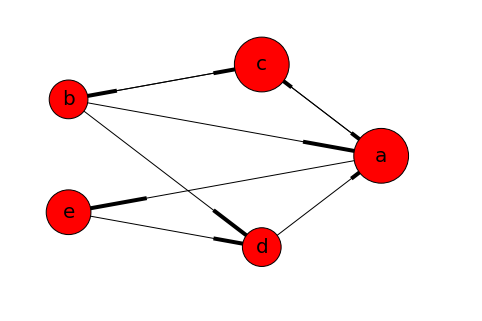

In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
dg = nx.DiGraph()
label = {}
id = [{'id':'a', 'follow':['b','c','d'], 'value':200}, {'id':'b', 'follow':['c'], 'value':100}, {'id':'c', 'follow':['b','a'], 'value':150}, {'id':'d', 'follow':['b','e'], 'value':50}, {'id':'e', 'follow':['a'], 'value':50}]
for i in id:
    dg.add_node(i['id'], value=i['value']) 
    label[i['id']] = i['id']
for i in id:
    for f in i['follow']:
        dg.add_weighted_edges_from([(f, i['id'], dg.node[f]['value'])])
for node in id:
    print 'id: %s | value: %d | follower: %s | in-degree: %d' %(node['id'],dg.node[node['id']]['value'],','.join(node['follow']),dg.in_degree(node['id'],weight='weight'))
d =  dg.in_degree(weight='weight').values()
pos = nx.shell_layout(dg)
nx.draw(dg, pos, with_labels=True, node_size=[v*10 for v in d], font_size=20)
print nx.k_core(dg, k=3).nodes()

[1, 2]


In [122]:
from PIL import Image
im=Image.open('/Users/fan/Desktop/unnamed.jpg')
im.size

(600, 428)

In [25]:
from pymongo import MongoClient
connection = MongoClient("localhost", 27017)
db = connection["userdata"]
network = db.network
print network.count()

351


In [57]:
import networkx as nx
dg = nx.DiGraph()
personalization = {}
n = network.count()
for ele in network.find():
    id = ele['_id']
    personalization[id] = float(ele['follower_cnt'])/n
    dg.add_node(id)
    normalized = sum(ele['like'].values())
    for auth in ele['like']:
        w = ele['like'][auth]
        dg.add_weighted_edges_from([(id, auth, float(w)/normalized)])

In [58]:
print dg.predecessors('54ac229cd4fdab6eca38e0ea')

[u'54e41f9a2756dd560a9c0203', u'54cbaee52756dd349e0323e4', u'539890c46f345b4b0b939430', u'54b114cad4fdab6e505f89ec', u'551eb56b2756dd03a04aba48', u'54f137b62756dd5ec247c3e7', u'54323120d4fdab46b1ce1c21', u'554f49c92756dd4434422393', u'534177ef40d18d5665e92d1e', u'5363961c40d18d18bc631aa7', u'54c5d8ad2756dd22a92e6e7f', u'55cc61452756dd430d11f89e', u'534d42eb40d18d04d8970626', u'539954396f345b69708ca6c9', u'53a248156f345b2bab76db93', u'54b604aed4fdab68baa88539', u'54a816aed4fdab71d051b2a2', u'541f7f44d4fdab26b9209927', u'53a0656b6f345b0728617086', u'54abb439d4fdab62075d706b', u'55a3a9392756dd05d99d6850', u'54f8f7ad2756dd78eb6bdce0', u'55e3c966699b6e0967779e10', u'53b0620ad4fdab1e37f2a05e', u'5361012040d18d098374cc43', u'53a3c2666f345b4fadc684ad', u'5549c68b2756dd1e46f7395e', u'546b7f52d4fdab1c35b7a062', u'54f7f47f2756dd539518580a', u'54b3e00ad4fdab26d1bb5fd8', u'56769b4b2756dd789a41b644', u'544acf8bd4fdab73544afc21', u'53bea4b8d4fdab24c242b529', u'54bbde9ad4fdab35e104f231', u'55238e92275

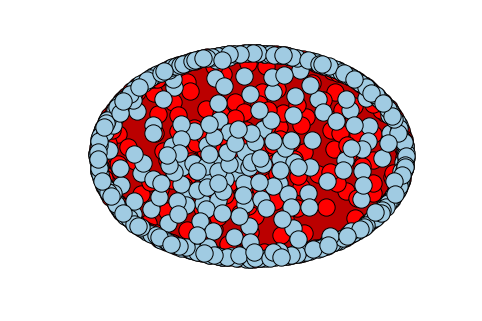

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
pos = nx.draw_spring(dg)
nx.draw(dg, pos, node_color='#A0CBE2', edge_color='#BB0000', width=2, edge_cmap=plt.cm.Blues)
#plt.savefig("graph.png", dpi=1000)